In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [7]:
df=pd.read_csv('house_sale.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [8]:
df.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [9]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

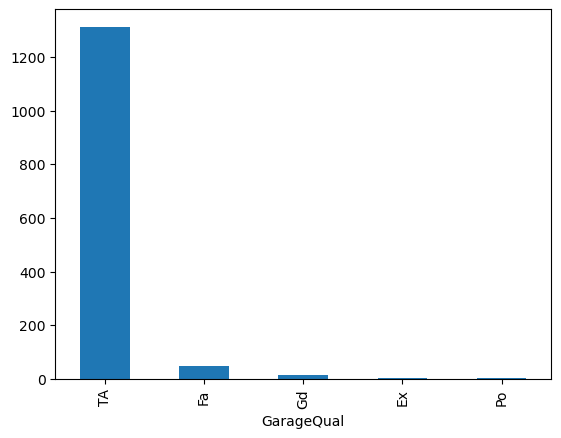

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

In [11]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [12]:
df.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

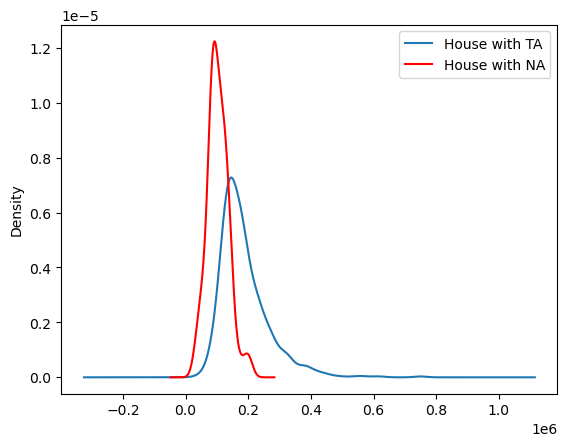

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

C:\Users\DELL\AppData\Local\Temp\ipykernel_18156\2474052268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna("TA",inplace=True)


<Axes: xlabel='GarageQual'>

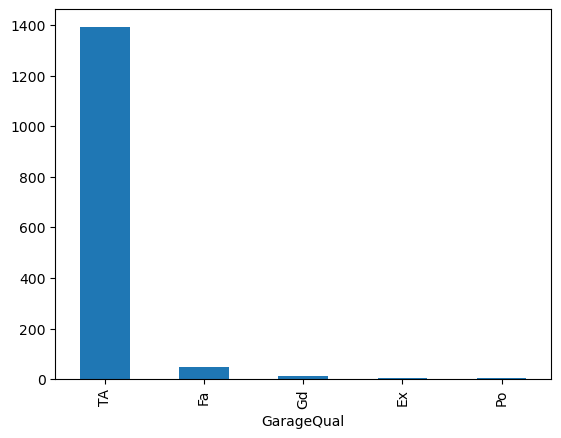

In [15]:
temp=df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna("TA",inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

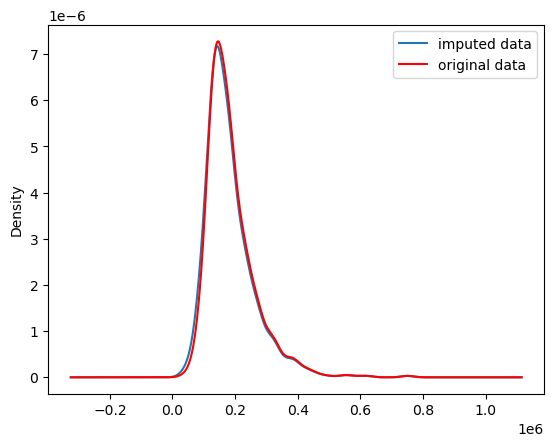

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
temp.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['imputed data','original data']
ax.legend(lines,labels,loc='best')

<Axes: xlabel='FireplaceQu'>

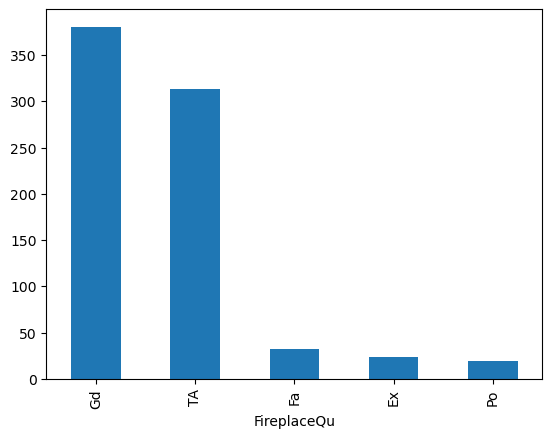

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')


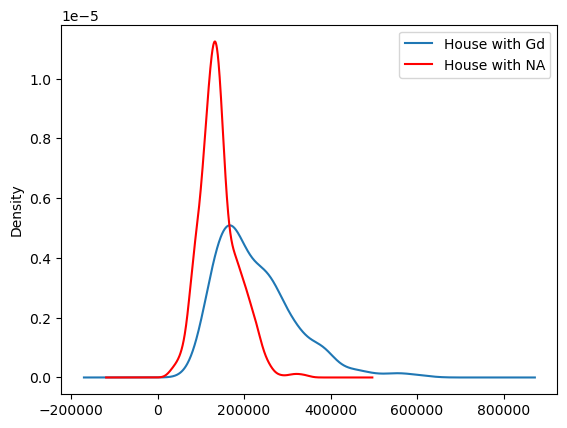

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['House with Gd','House with NA']
ax.legend(lines,labels,loc='best')


C:\Users\DELL\AppData\Local\Temp\ipykernel_18156\3383603944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna("Gd",inplace=True)


<Axes: xlabel='FireplaceQu'>

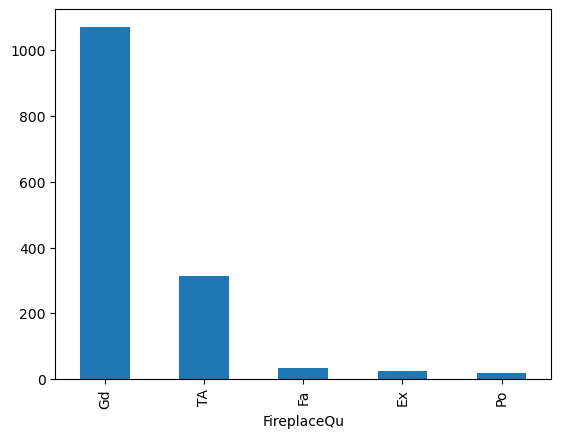

In [20]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna("Gd",inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

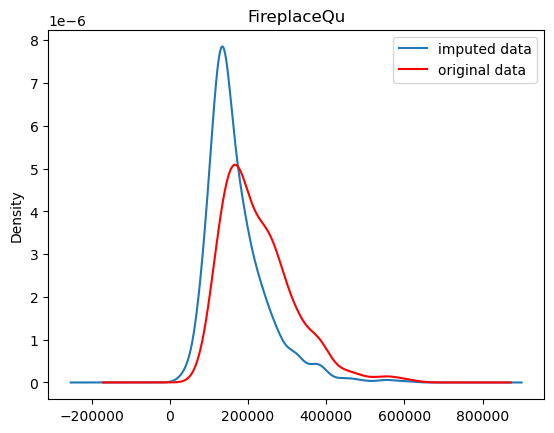

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
temp.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['imputed data','original data']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

# impute using sklearn

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=2)

In [26]:
x_train

,FireplaceQu,GarageQual
455,TA,TA
863,Gd,TA
504,Fa,TA
1413,Gd,TA
1389,Gd,TA
...,...,...
466,Po,TA
299,Gd,TA
493,Fa,TA
527,Gd,TA


In [27]:
x_test

,FireplaceQu,GarageQual
503,TA,TA
101,TA,TA
608,Gd,TA
1089,Gd,TA
819,Gd,TA
...,...,...
816,Gd,TA
1273,Gd,TA
285,Gd,TA
194,Gd,TA


In [28]:
impute=SimpleImputer(strategy='most_frequent')
x_train=impute.fit_transform(x_train)
x_test=impute.transform(x_test)

In [29]:
impute.statistics_

array(['Gd', 'TA'], dtype=object)